## Project 1: Exploratory Data Analysis (EDA)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import datetime
from datetime import datetime as dt

In [2]:
pd.options.mode.chained_assignment = None

### 1. Import Data Sources

#### A. MTA turnstile data (Apr to Jun 2018 and 2019)

In [3]:
list1 = pd.date_range(start = '4/06/2019', end = '6/29/2019', periods = 13)

In [4]:
list2 = [x.strftime('%y%m%d') for x in list1]

In [5]:
list3 = []
for i in list2:
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_" + i + ".txt"
    df = pd.read_csv(url)
    list3.append(df)

In [6]:
df_MTA = pd.concat(list3)

In [7]:
with open('df_MTA.pickle', 'wb') as to_write:
    pickle.dump(df_MTA, to_write)

In [8]:
del df_MTA

#### B. US Census Bureau Data (TractID, Income Data)

In [9]:
df1 = pd.read_csv('acs2017_census_tract_data.csv')

#### C. NYC Subway Station Geo Data (Latitude, Longitude)

In [10]:
nyc_df = pd.read_csv('http://web.mta.info/developers/data/nyct/subway/Stations.csv')

### 2. Exploratory Data Analysis and Visualization

#### A. MTA turnstile data (Apr to Jun 2018 and 2019)

In [11]:
with open('df_MTA.pickle', 'rb') as read_file:
    df_MTA = pickle.load(read_file)

In [12]:
df_MTA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2664248 entries, 0 to 205962
Data columns (total 11 columns):
 #   Column                                                                Dtype 
---  ------                                                                ----- 
 0   C/A                                                                   object
 1   UNIT                                                                  object
 2   SCP                                                                   object
 3   STATION                                                               object
 4   LINENAME                                                              object
 5   DIVISION                                                              object
 6   DATE                                                                  object
 7   TIME                                                                  object
 8   DESC                                                           

In [13]:
mask1 = ((df_MTA["C/A"] == "PTH22")
         & (df_MTA["UNIT"] == "R540")
         & (df_MTA["SCP"] == "00-04-04")
         & (df_MTA["STATION"] == "PATH NEW WTC"))

#### <font color='red'> *Notice how DATE skips from 5/7/2019 to 6/5/2019 below for the C/A, UNIT, SCP, STATION combo below*

In [14]:
df_MTA[mask1][218:222]

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
125704,PTH22,R540,00-04-04,PATH NEW WTC,1,PTH,05/07/2019,05:04:02,REGULAR,11906,241488
125705,PTH22,R540,00-04-04,PATH NEW WTC,1,PTH,05/07/2019,09:16:02,REGULAR,11906,241635
126878,PTH22,R540,00-04-04,PATH NEW WTC,1,PTH,06/05/2019,12:20:37,REGULAR,4,75
126879,PTH22,R540,00-04-04,PATH NEW WTC,1,PTH,06/05/2019,16:32:37,REGULAR,4,84


In [15]:
df_MTA.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

In [16]:
df_MTA.columns = [column.strip() for column in df_MTA.columns]

In [17]:
df_MTA.DATE.value_counts().sort_index()

03/30/2019    28919
03/31/2019    28944
04/01/2019    29152
04/02/2019    28975
04/03/2019    29104
              ...  
06/24/2019    29479
06/25/2019    29437
06/26/2019    29417
06/27/2019    29464
06/28/2019    29779
Name: DATE, Length: 91, dtype: int64

In [18]:
df_MTA["DATE_TIME"] = pd.to_datetime(df_MTA.DATE + " " + df_MTA.TIME, format="%m/%d/%Y %H:%M:%S")

In [19]:
# check for duplicates, for each combination of "C/A", "UNIT", "SCP", "STATION", "DATE_TIME"
(df_MTA
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(10)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
626289,N045,R187,01-00-00,81 ST-MUSEUM,2019-06-01 17:00:00,2
2178082,R283,R221,00-00-00,167 ST,2019-04-16 04:00:00,2
384181,G009,R151,02-00-04,CONEY IS-STILLW,2019-05-16 17:00:00,2
1749648,R133,R272,00-00-00,28 ST,2019-04-09 13:00:00,2
626294,N045,R187,01-00-00,81 ST-MUSEUM,2019-06-02 17:00:00,2
627445,N045,R187,01-00-02,81 ST-MUSEUM,2019-06-17 09:00:00,2
527149,JFK03,R536,00-00-04,JFK JAMAICA CT1,2019-04-07 01:00:00,2
627947,N045,R187,01-06-00,81 ST-MUSEUM,2019-06-11 21:00:00,2
701781,N071,R013,00-00-03,34 ST-PENN STA,2019-04-20 08:00:00,2
525303,JFK03,R536,00-00-01,JFK JAMAICA CT1,2019-04-07 01:00:00,2


In [20]:
mask = ((df_MTA["C/A"] == "N071") & 
(df_MTA["UNIT"] == "R013") & 
(df_MTA["SCP"] == "00-00-02") & 
(df_MTA["STATION"] == "34 ST-PENN STA") &
(df_MTA["DATE_TIME"].dt.date == datetime.datetime(2019, 4, 20).date()))

In [21]:
df_MTA[mask]

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
53584,N071,R013,00-00-02,34 ST-PENN STA,ACE,IND,04/20/2019,00:00:00,RECOVR AUD,3071535,4512012,2019-04-20 00:00:00
53585,N071,R013,00-00-02,34 ST-PENN STA,ACE,IND,04/20/2019,04:00:00,REGULAR,8481280,10918514,2019-04-20 04:00:00
53586,N071,R013,00-00-02,34 ST-PENN STA,ACE,IND,04/20/2019,08:00:00,REGULAR,8481300,10918541,2019-04-20 08:00:00
53587,N071,R013,00-00-02,34 ST-PENN STA,ACE,IND,04/20/2019,08:00:00,RECOVR AUD,3071562,4512111,2019-04-20 08:00:00
53588,N071,R013,00-00-02,34 ST-PENN STA,ACE,IND,04/20/2019,12:00:00,REGULAR,3071678,4512313,2019-04-20 12:00:00
53589,N071,R013,00-00-02,34 ST-PENN STA,ACE,IND,04/20/2019,16:00:00,REGULAR,3071862,4512589,2019-04-20 16:00:00
53590,N071,R013,00-00-02,34 ST-PENN STA,ACE,IND,04/20/2019,20:00:00,REGULAR,3072147,4512819,2019-04-20 20:00:00


In [22]:
df_MTA.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True, ascending=True)

In [23]:
df_MTA.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)

In [24]:
df_MTA.DESC.value_counts()

REGULAR       2652913
RECOVR AUD      11279
Name: DESC, dtype: int64

In [25]:
df_MTA_2019 = df_MTA

In [26]:
df_MTA_2019['LINENAME'] = df_MTA_2019['LINENAME'].apply(lambda x: ''.join(sorted(x)))

In [27]:
df_MTA_2019['station_linename'] = df_MTA_2019['STATION'] + "_" + df_MTA_2019["LINENAME"]

In [28]:
list_of_station_linenames = sorted(df_MTA_2019['station_linename'].unique())

In [29]:
x = list(df_MTA_2019['STATION'].unique())

In [30]:
# confirm that there are no "_" in "STATION" column (so you can split using "_" below)
set(np.char.find(x, '_'))

{-1}

In [31]:
# Create a dictionary called station_linenames_dict where keys are station names, 
# values are unique line names that run out of that station
# Assumption is that if a "STATION" has unique linenames, it is a unique STATION (physical/geo/map)
# PURPOSE is to separate "STATION" into individual separate subway stations in real life NYC (e.g. 23rd St, 86th St, 125th St)
station_linenames_dict = {}

for station_linename in list_of_station_linenames:
    # split into station and linename
    station, linename = station_linename.split('_')
    
    if station in station_linenames_dict:
        
        unique_linename = True
        for current_values in station_linenames_dict[station]:
        # if linename shares any linenames with other station/linenames, set linename to the union of all shared linenames   
            if set(linename).intersection(set(current_values)):
                station_linenames_dict[station] = [''.join(sorted(set(linename).union(set(current_values))))]
                unique_linename = False
        
        # if unique linename, then assume it is a separate subway station in real life NYC 
        if unique_linename == True:
            station_linenames_dict[station].append(linename)
    
    else:
        station_linenames_dict[station] = [linename]

In [32]:
def proper_station_linename_column(df):  
    """
    Function below to account for multiple subway stations in real life NYC showing up as the same string in 
    'STATION' column (e.g. 23rd St, 86th St, 125th St)
    
    :param input df: pandas dataframe with "STATION" column
    :param output/return: change "STATION" to "station_linename" only if there are multiple linenames
    """
    if len(station_linenames_dict[df["STATION"]]) > 1:
        df["STATION"] = df["station_linename"]
    return df['STATION']

In [33]:
df_MTA_2019['STATION'] = df_MTA_2019.apply(proper_station_linename_column, axis=1)

In [34]:
# take the first row for each combination of "C/A", "UNIT", "SCP", "STATION", "DATE" to later calculate daily entries/exits
df_MTA_2019_daily = (df_MTA_2019
                     .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"],as_index=False)[["ENTRIES","EXITS"]]
                     .first())

In [35]:
df_MTA_2019_daily["PREV_DATE"] = (df_MTA_2019_daily
                                  .groupby(["C/A", "UNIT", "SCP", "STATION"])
                                  .DATE
                                  .apply(lambda group: group.shift(1)))

In [36]:
df_MTA_2019_daily["PREV_ENTRIES"] = (df_MTA_2019_daily
                                     .groupby(["C/A", "UNIT", "SCP", "STATION"])
                                     .ENTRIES
                                     .apply(lambda group: group.shift(1)))

In [37]:
df_MTA_2019_daily["PREV_EXITS"] = (df_MTA_2019_daily
                                   .groupby(["C/A", "UNIT", "SCP", "STATION"])
                                   .EXITS
                                   .apply(lambda group: group.shift(1)))

In [38]:
# check if entries is less than previous day's entries
# perhaps turnstiles are working in reverse order/count
df_MTA_2019_daily[df_MTA_2019_daily["ENTRIES"] < df_MTA_2019_daily["PREV_ENTRIES"]].head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,EXITS,PREV_DATE,PREV_ENTRIES,PREV_EXITS
7044,A025,R023,01-03-01,34 ST-HERALD SQ,03/31/2019,1238567092,1813218523,03/30/2019,1.238570e+09,1.813217e+09
7045,A025,R023,01-03-01,34 ST-HERALD SQ,04/01/2019,1238565030,1813219495,03/31/2019,1.238567e+09,1.813219e+09
7046,A025,R023,01-03-01,34 ST-HERALD SQ,04/02/2019,1238561212,1813221361,04/01/2019,1.238565e+09,1.813219e+09
7047,A025,R023,01-03-01,34 ST-HERALD SQ,04/03/2019,1238557159,1813223205,04/02/2019,1.238561e+09,1.813221e+09
7048,A025,R023,01-03-01,34 ST-HERALD SQ,04/04/2019,1238553023,1813225047,04/03/2019,1.238557e+09,1.813223e+09


In [39]:
(df_MTA_2019_daily[df_MTA_2019_daily["ENTRIES"] < df_MTA_2019_daily["PREV_ENTRIES"]]
 .groupby(["C/A", "UNIT", "SCP", "STATION"])
 .size())

C/A   UNIT  SCP       STATION        
A025  R023  01-03-01  34 ST-HERALD SQ    90
A037  R170  05-00-00  14 ST-UNION SQ      1
A038  R085  00-00-01  8 ST-NYU            1
            00-06-00  8 ST-NYU            1
A039  R085  01-00-01  8 ST-NYU            1
                                         ..
R623  R061  00-00-00  NOSTRAND AV_3       1
            00-00-01  NOSTRAND AV_3       1
R629  R065  00-00-00  ROCKAWAY AV_3       1
R646  R110  01-00-01  FLATBUSH AV-B.C    90
R730  R431  00-00-04  EASTCHSTER/DYRE    86
Length: 547, dtype: int64

In [40]:
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        counter = -counter
    if counter > max_counter:
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
    if counter > max_counter:
        return 0
    return counter

In [41]:
# 60 seconds per minute, 60 min per hour, 24 hours per day; 1 person per second (starting assumption)
60*60*24

86400

In [42]:
df_MTA_2019_daily["DAILY_ENTRIES"] = (df_MTA_2019_daily
                                      .apply(get_daily_counts, 
                                             axis=1, 
                                             max_counter = 86400))

In [43]:
# since group C/A, UNIT, SCP, STATION was sorted based on ascending order, taking the first row for each group
# provides timestamp at midnight 00:00:00 (or early hours) of that day, therefore DAILY_ENTRIES provides the 
# number of daily entries for the previous day, so it needs to be shifted up one row for each group
df_MTA_2019_daily["DAILY_ENTRIES_ADJ"] = (df_MTA_2019_daily
                                          .groupby(["C/A", "UNIT", "SCP", "STATION"])
                                          .DAILY_ENTRIES
                                          .apply(lambda x: x.shift(-1)))

In [44]:
df_MTA_2019_daily.drop(columns=["DAILY_ENTRIES"], inplace = True)

In [45]:
df_MTA_2019_daily.rename(columns={"DAILY_ENTRIES_ADJ":"DAILY_ENTRIES"}, inplace = True)

In [46]:
df_MTA_2019_daily.sort_values(by = "DAILY_ENTRIES", ascending = False).head(10)

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,EXITS,PREV_DATE,PREV_ENTRIES,PREV_EXITS,DAILY_ENTRIES
256139,PTH07,R550,00-01-06,CITY / BUS,06/11/2019,85343,79992,06/10/2019,85075.0,79758.0,85232.0
273138,PTH22,R540,00-04-06,PATH NEW WTC,05/31/2019,84511,268115,05/30/2019,84351.0,267822.0,84503.0
249491,PTH03,R552,00-01-08,JOURNAL SQUARE,06/07/2019,84386,74161,06/06/2019,84301.0,74091.0,84320.0
247787,PTH03,R552,00-00-00,JOURNAL SQUARE,06/07/2019,84321,34517,06/06/2019,83891.0,34264.0,84162.0
248758,PTH03,R552,00-01-00,JOURNAL SQUARE,05/23/2019,84213,152211,05/22/2019,81090.0,146202.0,83425.0
87518,JFK03,R536,00-03-04,JFK JAMAICA CT1,04/30/2019,83297,471268,04/29/2019,83073.0,469778.0,83296.0
262761,PTH16,R550,01-02-02,LACKAWANNA,06/11/2019,83248,357312,06/10/2019,83065.0,356671.0,83241.0
245425,PTH01,R549,00-01-03,NEWARK HW BMEBE,05/20/2019,83070,938506,05/19/2019,83070.0,938294.0,83070.0
265486,PTH18,R549,01-01-01,NEWARK BM BW,06/05/2019,82876,1819,06/04/2019,81380.0,1787.0,82697.0
269914,PTH22,R540,00-00-01,PATH NEW WTC,05/14/2019,82578,184412,05/13/2019,81864.0,182703.0,82409.0


In [47]:
# create a mask for one of the rows above where the daily entries is very very large
mask3 = ((df_MTA_2019_daily["C/A"] == "PTH22") 
         & (df_MTA_2019_daily["UNIT"] == "R540") 
         & (df_MTA_2019_daily["SCP"] == "00-04-06")
         & (df_MTA_2019_daily["STATION"] == "PATH NEW WTC"))

In [48]:
df_MTA_2019_daily[mask3][-30:-20]

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,EXITS,PREV_DATE,PREV_ENTRIES,PREV_EXITS,DAILY_ENTRIES
273133,PTH22,R540,00-04-06,PATH NEW WTC,05/26/2019,83909,267068,05/25/2019,83899.0,266971.0,21.0
273134,PTH22,R540,00-04-06,PATH NEW WTC,05/27/2019,83930,267146,05/26/2019,83909.0,267068.0,10.0
273135,PTH22,R540,00-04-06,PATH NEW WTC,05/28/2019,83940,267210,05/27/2019,83930.0,267146.0,190.0
273136,PTH22,R540,00-04-06,PATH NEW WTC,05/29/2019,84130,267517,05/28/2019,83940.0,267210.0,221.0
273137,PTH22,R540,00-04-06,PATH NEW WTC,05/30/2019,84351,267822,05/29/2019,84130.0,267517.0,160.0
273138,PTH22,R540,00-04-06,PATH NEW WTC,05/31/2019,84511,268115,05/30/2019,84351.0,267822.0,84503.0
273139,PTH22,R540,00-04-06,PATH NEW WTC,06/05/2019,8,48,05/31/2019,84511.0,268115.0,156.0
273140,PTH22,R540,00-04-06,PATH NEW WTC,06/06/2019,164,121,06/05/2019,8.0,48.0,222.0
273141,PTH22,R540,00-04-06,PATH NEW WTC,06/07/2019,386,483,06/06/2019,164.0,121.0,114.0
273142,PTH22,R540,00-04-06,PATH NEW WTC,06/08/2019,500,774,06/07/2019,386.0,483.0,0.0


In [49]:
df_MTA_2019_daily[mask3]["DAILY_ENTRIES"].max()

84503.0

In [50]:
df_MTA_2019_daily[mask3]["DAILY_ENTRIES"].median()

148.0

In [51]:
df_MTA_2019_daily[mask3]["DAILY_ENTRIES"].max() / df_MTA_2019_daily[mask3]["DAILY_ENTRIES"].median()

570.9662162162163

/Users/matty2/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/matty2/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


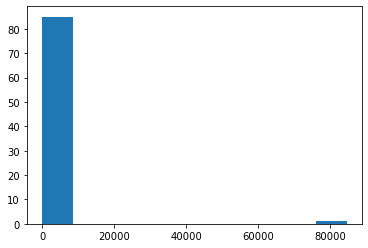

In [52]:
# plot daily entries based on the conditions in mask3, clearly there is an outlier!
plt.hist(df_MTA_2019_daily[mask3].DAILY_ENTRIES)
plt.savefig('hist_PTH22_R540_000406_PATHNEWWTC.outlier.png');

In [53]:
# create a new column "DATE_DIFF" to see the difference between "DATE" and "PREV_DATE"
df_MTA_2019_daily["DATE_DIFF"] = pd.to_datetime(df_MTA_2019_daily.DATE) - pd.to_datetime(df_MTA_2019_daily.PREV_DATE)

In [54]:
# look at all the rows where date_diff is greater than 1 day
df_MTA_2019_daily.sort_values(by="DATE_DIFF",ascending=False).head(10)

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,EXITS,PREV_DATE,PREV_ENTRIES,PREV_EXITS,DAILY_ENTRIES,DATE_DIFF
246335,PTH02,R544,00-00-08,HARRISON,05/24/2019,142284,6516,04/13/2019,655363.0,82906.0,NaN,41 days
272966,PTH22,R540,00-04-04,PATH NEW WTC,06/05/2019,4,75,05/07/2019,11906.0,241487.0,6.0,29 days
268439,PTH20,R549,03-00-08,NEWARK HM HE,05/20/2019,36975,1148746,04/25/2019,409.0,2356.0,36546.0,25 days
199341,N414A,R316,01-00-01,FLUSHING AV_G,05/02/2019,547675,230120,04/08/2019,547673.0,230118.0,0.0,24 days
199409,N414A,R316,01-00-02,FLUSHING AV_G,05/02/2019,1469103,668846,04/08/2019,1469100.0,668841.0,0.0,24 days
199477,N414A,R316,01-06-00,FLUSHING AV_G,05/02/2019,1721039,1610756,04/08/2019,1721035.0,1610752.0,0.0,24 days
199545,N414A,R316,01-06-01,FLUSHING AV_G,05/02/2019,2275461,2828879,04/08/2019,2275458.0,2828875.0,0.0,24 days
199273,N414A,R316,01-00-00,FLUSHING AV_G,05/02/2019,665527,741121,04/08/2019,665524.0,741116.0,0.0,24 days
78171,J002,R460,00-06-00,MARCY AV,05/08/2019,196696,218,04/17/2019,1969149.0,4031712.0,210.0,21 days
292397,R137,R031,02-03-01,34 ST-PENN STA,06/28/2019,76679,71988,06/11/2019,76679.0,56951.0,NaN,17 days


In [55]:
time_range = pd.timedelta_range(start='1 day',periods=1)

In [56]:
# create a new dataframe to filter those specific rows where the difference between 
# DATE and PREV_DATE > 1 day
df_MTA_2019_highdatediff = df_MTA_2019_daily[df_MTA_2019_daily.DATE_DIFF > time_range[0]]

In [57]:
# remove all rows where DATE_DIFF > 1 day
df_MTA_2019_daily.drop(df_MTA_2019_highdatediff.index, inplace=True)

In [58]:
# for a unique turnstile at a subway station, find the max and median daily_entries
df_MTA_2019_dailystats = (df_MTA_2019_daily
                           .groupby(["C/A","UNIT","SCP","STATION"])
                           .agg({"DAILY_ENTRIES": [np.max, np.median]}))

In [59]:
df_MTA_2019_dailystats = pd.DataFrame(df_MTA_2019_dailystats)

In [60]:
df_MTA_2019_dailystats.reset_index(inplace = True)

In [61]:
df_MTA_2019_dailystats.columns = ["C/A", "UNIT", "SCP", "STATION", "MAX_DAILY_ENTRIES_TURNSTILE", 
                                  "MEDIAN_DAILY_ENTRIES_TURNSTILE"]

In [62]:
df_MTA_2019_dailystats['peak_factor'] = (df_MTA_2019_dailystats["MAX_DAILY_ENTRIES_TURNSTILE"] / 
                                         df_MTA_2019_dailystats["MEDIAN_DAILY_ENTRIES_TURNSTILE"])

In [63]:
df_MTA_2019_dailystats.sort_values(by = 'peak_factor', ascending = False).head()

,C/A,UNIT,SCP,STATION,MAX_DAILY_ENTRIES_TURNSTILE,MEDIAN_DAILY_ENTRIES_TURNSTILE,peak_factor
4911,TRAM2,R469,00-05-00,RIT-ROOSEVELT,3.0,0.0,inf
2919,PTH13,R541,00-04-08,THIRTY ST,1.0,0.0,inf
2605,N601,R319,00-05-00,LEXINGTON AV/63,4.0,0.0,inf
177,A046,R463,00-05-02,CANAL ST_6JNQRWZ,4.0,0.0,inf
4335,R421,R427,00-06-00,MIDDLETOWN RD,2.0,0.0,inf


In [64]:
df_MTA_2019_dailystats.replace(to_replace = np.inf, value = np.nan, inplace = True)

In [65]:
df_MTA_2019_dailystats.sort_values(by = 'peak_factor', ascending = False).head(10)

,C/A,UNIT,SCP,STATION,MAX_DAILY_ENTRIES_TURNSTILE,MEDIAN_DAILY_ENTRIES_TURNSTILE,peak_factor
2737,PTH01,R549,00-01-03,NEWARK HW BMEBE,83070.0,1.0,83070.000000
3058,PTH22,R540,00-04-02,PATH NEW WTC,22190.0,1.0,22190.000000
1066,N013,R035,02-05-00,168 ST,5064.0,1.0,5064.000000
3059,PTH22,R540,00-04-03,PATH NEW WTC,27148.0,6.0,4524.666667
1115,N026,R102,00-05-00,125 ST_ABCD,13389.0,3.5,3825.428571
4545,R532,R328,00-05-03,METS-WILLETS PT,1691.0,0.5,3382.000000
4544,R532,R328,00-05-02,METS-WILLETS PT,2337.0,1.0,2337.000000
1195,N051,R084,02-05-00,59 ST COLUMBUS,5921.0,3.0,1973.666667
2869,PTH07,R550,00-02-01,CITY / BUS,13830.0,8.0,1728.750000
3060,PTH22,R540,00-04-04,PATH NEW WTC,11902.0,7.0,1700.285714


In [66]:
df_MTA_2019_daily["unique_turnstile"] = (df_MTA_2019_daily["C/A"] + "_" +
                                         df_MTA_2019_daily["UNIT"] + "_" +
                                         df_MTA_2019_daily["SCP"] + "_" +
                                         df_MTA_2019_daily["STATION"])

In [67]:
df_MTA_2019_dailystats["unique_turnstile"] = (df_MTA_2019_dailystats["C/A"] + "_" +
                                              df_MTA_2019_dailystats["UNIT"] + "_" +
                                              df_MTA_2019_dailystats["SCP"] + "_" +
                                              df_MTA_2019_dailystats["STATION"])

In [68]:
df_MTA_2019_dailystats_sum = df_MTA_2019_dailystats[["unique_turnstile",
                                                     "MAX_DAILY_ENTRIES_TURNSTILE",
                                                     "MEDIAN_DAILY_ENTRIES_TURNSTILE",
                                                     "peak_factor"]]

**Merge max/median daily entries and peak entries by station/turnstile into the main dataframe df_MTA_2019_daily**

In [69]:
df_MTA_2019_daily = df_MTA_2019_daily.merge(df_MTA_2019_dailystats_sum, 
                                            how = 'left', 
                                            on = 'unique_turnstile')

In [70]:
# create a mask to identify outliers, where 
# peak factor (max divided by median) is greater than 10 
# AND daily entries is at least 90% of max daily entries by turnstile
# AND max daily entries turnstile is at least 10000
mask7 = ((df_MTA_2019_daily['peak_factor'] > 10) 
         & (df_MTA_2019_daily['DAILY_ENTRIES'] >= 0.9*df_MTA_2019_daily["MAX_DAILY_ENTRIES_TURNSTILE"])
         & (df_MTA_2019_daily['MAX_DAILY_ENTRIES_TURNSTILE'] >= 10000))

In [71]:
df_MTA_2019_daily = df_MTA_2019_daily[~mask7]

In [72]:
# mask to identify high outliers, DAILY_ENTRIES > 5*median daily entries for that turnstile
mask_high_daily_entries = df_MTA_2019_daily["DAILY_ENTRIES"] > 5*df_MTA_2019_daily["MEDIAN_DAILY_ENTRIES_TURNSTILE"]

In [73]:
df_MTA_2019_daily = df_MTA_2019_daily[~mask_high_daily_entries]

In [74]:
def daily_exits(df, max_counter):
    """
    Function to calculate daily number of exits at turnstiles in NYC subway stations.
    Accounts for turnstiles in reverse order as well as large daily exits values.
    
    Args:
        df: pandas dataframe with columns "EXITS" and "PREV_EXITS"
        max_counter: integer
    
    Returns:
        counter
    """
    counter = df["EXITS"] - df["PREV_EXITS"]
    if counter < 0:
        counter = -counter
    if counter > max_counter:
        counter = min(df["EXITS"], df["PREV_EXITS"])
    if counter > max_counter:
        return 0
    return counter

In [75]:
df_MTA_2019_daily["DAILY_EXITS"] = df_MTA_2019_daily.apply(daily_exits, axis=1, max_counter=86400)

In [76]:
# similar to DAILY_ENTRIES_ADJ, need to shift up 1 b/c original group object was sorted in 
# ascending order and timestamps were at/around midnight
df_MTA_2019_daily["DAILY_EXITS_ADJ"] = (df_MTA_2019_daily
                                        .groupby(["C/A", "UNIT", "SCP", "STATION"])
                                        .DAILY_EXITS
                                        .apply(lambda x: x.shift(-1)))

In [77]:
df_MTA_2019_daily.drop(columns=["DAILY_EXITS"], inplace = True)

In [78]:
df_MTA_2019_daily.rename(columns = {"DAILY_EXITS_ADJ":"DAILY_EXITS"}, inplace = True)

**Create a separate dataframe df_MTA_2019_daily_exits with max/median of DAILY_EXITS by combination "C/A", "UNIT", "SCP", "STATION" (each station/turnstile). Similar to df_MTA_2019_dailystats above.**

In [79]:
df_MTA_2019_daily_exits = (df_MTA_2019_daily
                           .groupby(["C/A","UNIT","SCP","STATION"])
                           .agg({"DAILY_EXITS": [np.max, np.median]}))

In [80]:
df_MTA_2019_daily_exits.reset_index(inplace=True)

In [81]:
df_MTA_2019_daily_exits.columns = ["C/A","UNIT","SCP","STATION","MAX_DAILY_EXITS_TURNSTILE",
                                   "MEDIAN_DAILY_EXITS_TURNSTILE"]

In [82]:
df_MTA_2019_daily_exits['peak_factor_exits'] = (df_MTA_2019_daily_exits["MAX_DAILY_EXITS_TURNSTILE"] / 
                                                df_MTA_2019_daily_exits["MEDIAN_DAILY_EXITS_TURNSTILE"])

In [83]:
df_MTA_2019_daily_exits["unique_turnstile"] = (df_MTA_2019_daily_exits["C/A"] + "_" +
                                               df_MTA_2019_daily_exits["UNIT"] + "_" +
                                               df_MTA_2019_daily_exits["SCP"] + "_" +
                                               df_MTA_2019_daily_exits["STATION"])

In [84]:
df_MTA_2019_daily_exits_sum = df_MTA_2019_daily_exits[["unique_turnstile",
                                                       "MAX_DAILY_EXITS_TURNSTILE",
                                                       "MEDIAN_DAILY_EXITS_TURNSTILE",
                                                       "peak_factor_exits"]]

*Merge max/median daily exits and peak factor back into original dataframe df_MTA_2019_daily*

In [85]:
df_MTA_2019_daily = (df_MTA_2019_daily
                     .merge(df_MTA_2019_daily_exits_sum,
                            how = 'left', 
                            on = 'unique_turnstile'))

In [86]:
# create a mask to identify outliers, where peak factor exits (max divided by median) is greater than 10 
# AND daily exits is at least 90% of max daily exits by turnstile
# AND max daily exits turnstile is at least 10000
mask9 = ((df_MTA_2019_daily['peak_factor_exits'] > 10) 
         & (df_MTA_2019_daily['DAILY_EXITS'] >= 0.9*df_MTA_2019_daily["MAX_DAILY_EXITS_TURNSTILE"])
         & (df_MTA_2019_daily['MAX_DAILY_EXITS_TURNSTILE'] >= 10000))

In [87]:
df_MTA_2019_daily = df_MTA_2019_daily[~mask9]

In [88]:
mask_high_daily_exits = df_MTA_2019_daily["DAILY_EXITS"] > 5*df_MTA_2019_daily["MEDIAN_DAILY_EXITS_TURNSTILE"]

In [89]:
# remove rows where daily exits is significantly greater than median daily exits
df_MTA_2019_daily = df_MTA_2019_daily[~mask_high_daily_exits]

In [90]:
def proper(x):
    return x.title()

In [91]:
df_MTA_2019_daily['Station'] = df_MTA_2019_daily['STATION'].apply(proper)

In [92]:
df_MTA_2019_daily.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'DATE', 'ENTRIES', 'EXITS',
       'PREV_DATE', 'PREV_ENTRIES', 'PREV_EXITS', 'DAILY_ENTRIES', 'DATE_DIFF',
       'unique_turnstile', 'MAX_DAILY_ENTRIES_TURNSTILE',
       'MEDIAN_DAILY_ENTRIES_TURNSTILE', 'peak_factor', 'DAILY_EXITS',
       'MAX_DAILY_EXITS_TURNSTILE', 'MEDIAN_DAILY_EXITS_TURNSTILE',
       'peak_factor_exits', 'Station'],
      dtype='object')

In [93]:
# drop some columns to clean up the dataframe
df_MTA_2019_daily.drop(columns=['DATE_DIFF','MAX_DAILY_ENTRIES_TURNSTILE',
                                'MEDIAN_DAILY_ENTRIES_TURNSTILE', 
                                'peak_factor', 
                                'MAX_DAILY_EXITS_TURNSTILE', 
                                'MEDIAN_DAILY_EXITS_TURNSTILE',
                                'peak_factor_exits'], inplace = True)

In [94]:
df_MTA_2019_daily["DAILY_TRAFFIC"] = (df_MTA_2019_daily["DAILY_ENTRIES"] 
                                      + df_MTA_2019_daily["DAILY_EXITS"]) 

In [95]:
df_MTA_2019_daily["DATE_TIME"] = pd.to_datetime(df_MTA_2019_daily["DATE"])

In [96]:
def string(x):
    return str(x)

In [97]:
df_MTA_2019_daily.to_pickle("./df_MTA_2019_daily_clean.pkl")

In [98]:
df_MTA_2019_daily_top5 = (df_MTA_2019_daily
                           .groupby('Station')['DAILY_TRAFFIC']
                           .sum()
                           .sort_values(ascending=False)
                           .head(5))

In [99]:
df_MTA_2019_top5 = pd.DataFrame(df_MTA_2019_daily_top5)
df_MTA_2019_top5.reset_index(inplace=True)

In [100]:
df_MTA_2019_top5

,Station,DAILY_TRAFFIC
0,34 St-Penn Sta,25447467.0
1,Grd Cntrl-42 St,20717561.0
2,34 St-Herald Sq,19033731.0
3,Times Sq-42 St,15918827.0
4,14 St-Union Sq,15839023.0


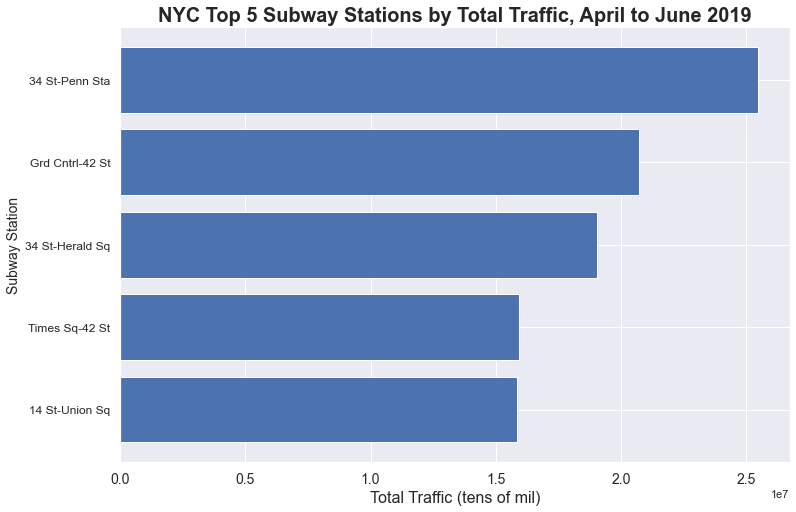

In [105]:
plt.figure(figsize=[12,8])
plt.barh(df_MTA_2019_top5.Station, df_MTA_2019_top5.DAILY_TRAFFIC)
plt.gca().invert_yaxis()
plt.title('NYC Top 5 Subway Stations by Total Traffic, April to June 2019', 
          weight = 'bold', fontsize = 20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=12)
plt.xlabel('Total Traffic (tens of mil)', fontsize = 16)
plt.ylabel('Subway Station', fontsize = 14)
plt.savefig('top_5_stations_traffic.png');

In [104]:
# change rc parameters with seaborn set method
sns.set(rc={'figure.figsize':(12,8)})

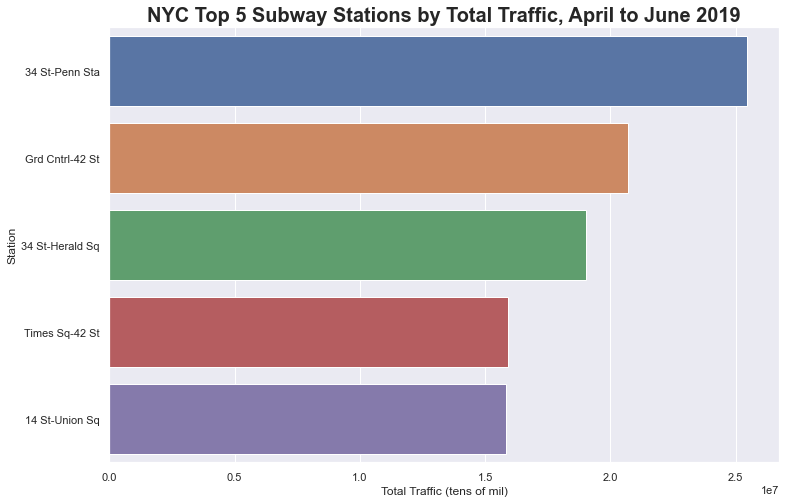

In [106]:
ax = sns.barplot(x = "DAILY_TRAFFIC", y = "Station", data = df_MTA_2019_top5, orient = 'h')
ax.set_title('NYC Top 5 Subway Stations by Total Traffic, April to June 2019', weight='bold', fontsize=20)
ax.set(xlabel = 'Total Traffic (tens of mil)')
fig = ax.get_figure()
fig.savefig('top_5_stations_seaborn.png');

#### B. US Census Bureau Data (TractID, Income Data)

In [107]:
df1.head()

,TractId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001020100,Alabama,Autauga County,1845,899,946,2.4,86.3,5.2,0.0,...,0.5,0.0,2.1,24.5,881,74.2,21.2,4.5,0.0,4.6
1,1001020200,Alabama,Autauga County,2172,1167,1005,1.1,41.6,54.5,0.0,...,0.0,0.5,0.0,22.2,852,75.9,15.0,9.0,0.0,3.4
2,1001020300,Alabama,Autauga County,3385,1533,1852,8.0,61.4,26.5,0.6,...,1.0,0.8,1.5,23.1,1482,73.3,21.1,4.8,0.7,4.7
3,1001020400,Alabama,Autauga County,4267,2001,2266,9.6,80.3,7.1,0.5,...,1.5,2.9,2.1,25.9,1849,75.8,19.7,4.5,0.0,6.1
4,1001020500,Alabama,Autauga County,9965,5054,4911,0.9,77.5,16.4,0.0,...,0.8,0.3,0.7,21.0,4787,71.4,24.1,4.5,0.0,2.3


In [108]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74001 entries, 0 to 74000
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   TractId           74001 non-null  int64  
 1   State             74001 non-null  object 
 2   County            74001 non-null  object 
 3   TotalPop          74001 non-null  int64  
 4   Men               74001 non-null  int64  
 5   Women             74001 non-null  int64  
 6   Hispanic          73305 non-null  float64
 7   White             73305 non-null  float64
 8   Black             73305 non-null  float64
 9   Native            73305 non-null  float64
 10  Asian             73305 non-null  float64
 11  Pacific           73305 non-null  float64
 12  VotingAgeCitizen  74001 non-null  int64  
 13  Income            72885 non-null  float64
 14  IncomeErr         72885 non-null  float64
 15  IncomePerCap      73256 non-null  float64
 16  IncomePerCapErr   73256 non-null  float6

In [109]:
df1 = df1[['TractId','State','County','Income']]
df1 = df1[df1.State == 'New York']

In [110]:
counties = ['New York County', 'Kings County', 'Bronx County', 'Richmond County', 'Queens County']

In [111]:
df1 = df1[df1.County.isin(counties)]

In [112]:
df1.reset_index(drop=True,inplace=True)

In [113]:
df1.shape

(2167, 4)

In [114]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2167 entries, 0 to 2166
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   TractId  2167 non-null   int64  
 1   State    2167 non-null   object 
 2   County   2167 non-null   object 
 3   Income   2101 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 67.8+ KB


In [115]:
# find the percentile of household income for each census tract ID
df1['Income_percentile'] = df1.Income.rank(pct=True)

In [116]:
# create a score based on income percentile * 10, round to nearest integer, integers from 1 to 10
df1['Score'] = (10*df1['Income_percentile']).apply(np.ceil)

In [117]:
df1.head()

,TractId,State,County,Income,Income_percentile,Score
0,36005000100,New York,Bronx County,NaN,NaN,NaN
1,36005000200,New York,Bronx County,62773.0,0.551642,6.0
2,36005000400,New York,Bronx County,82697.0,0.788196,8.0
3,36005001600,New York,Bronx County,33118.0,0.145169,2.0
4,36005001900,New York,Bronx County,40117.0,0.226559,3.0


In [118]:
df2 = df1[['TractId', 'Income', 'Income_percentile', 'Score']]

In [119]:
# convert TractId to string so it can used as the key to merge with nyc_subway dataframe (later)
df2["TractId"] = df2["TractId"].astype(str)

#### C. NYC Subway Station Geo Data (Latitude, Longitude)

In [120]:
nyc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496 entries, 0 to 495
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Station ID             496 non-null    int64  
 1   Complex ID             496 non-null    int64  
 2   GTFS Stop ID           496 non-null    object 
 3   Division               496 non-null    object 
 4   Line                   496 non-null    object 
 5   Stop Name              496 non-null    object 
 6   Borough                496 non-null    object 
 7   Daytime Routes         496 non-null    object 
 8   Structure              496 non-null    object 
 9   GTFS Latitude          496 non-null    float64
 10  GTFS Longitude         496 non-null    float64
 11  North Direction Label  478 non-null    object 
 12  South Direction Label  481 non-null    object 
dtypes: float64(2), int64(2), object(9)
memory usage: 50.5+ KB


In [121]:
nyc_df.head()

,Station ID,Complex ID,GTFS Stop ID,Division,Line,Stop Name,Borough,Daytime Routes,Structure,GTFS Latitude,GTFS Longitude,North Direction Label,South Direction Label
0,1,1,R01,BMT,Astoria,Astoria - Ditmars Blvd,Q,N W,Elevated,40.775036,-73.912034,NaN,Manhattan
1,2,2,R03,BMT,Astoria,Astoria Blvd,Q,N W,Elevated,40.770258,-73.917843,Ditmars Blvd,Manhattan
2,3,3,R04,BMT,Astoria,30 Av,Q,N W,Elevated,40.766779,-73.921479,Astoria - Ditmars Blvd,Manhattan
3,4,4,R05,BMT,Astoria,Broadway,Q,N W,Elevated,40.761820,-73.925508,Astoria - Ditmars Blvd,Manhattan
4,5,5,R06,BMT,Astoria,36 Av,Q,N W,Elevated,40.756804,-73.929575,Astoria - Ditmars Blvd,Manhattan


In [122]:
list3 = list(nyc_df['Borough'].unique())
list3

['Q', 'M', 'Bk', 'Bx', 'SI']

In [123]:
list4 = ['Queens', 'Manhattan', 'Brooklyn', 'Bronx', 'StatenIsland']

In [124]:
dict1 = dict()

In [125]:
for i in range(len(list3)):
    key = list3[i]
    dict1[key] = list4[i]

In [126]:
dict1

{'Q': 'Queens',
 'M': 'Manhattan',
 'Bk': 'Brooklyn',
 'Bx': 'Bronx',
 'SI': 'StatenIsland'}

In [127]:
nyc_df['Borough2'] = nyc_df.Borough.map(dict1)

In [128]:
nyc_df['Station_Division'] = nyc_df['Stop Name'] + "_" + nyc_df['Division']

In [129]:
nyc_subway = nyc_df.groupby(['Division','Stop Name','Borough','Station_Division','Borough2'])[['GTFS Latitude', 'GTFS Longitude']].mean()
nyc_subway.reset_index(inplace=True)

In [130]:
# Add a new column census tract ID
nyc_subway['census_tract_id'] = ""

In [131]:
import requests
import urllib

In [132]:
# use latitude and longitude of each subway station as inputs
# use FCC website API below, url with lat/long to get US Census GEOID info (e.g. Census Block, Census Tract ID)
# populate 'census tract ID' column in nyc_subway dataframe
for i in range(len(nyc_subway)):
    lat = nyc_subway.iloc[i,5]
    lon = nyc_subway.iloc[i,6]
    params = urllib.parse.urlencode({'latitude': lat, 'longitude':lon,'format':'json'})
    url = 'https://geo.fcc.gov/api/census/block/find?' + params
    nyc_subway.iloc[i,len(nyc_subway.columns)-1] = requests.get(url).json()['Block']['FIPS'][:11]

In [133]:
nyc_subway.head()

,Division,Stop Name,Borough,Station_Division,Borough2,GTFS Latitude,GTFS Longitude,census_tract_id
0,BMT,1 Av,M,1 Av_BMT,Manhattan,40.730953,-73.981628,36061003400
1,BMT,104 St,Q,104 St_BMT,Queens,40.695178,-73.844330,36081002600
2,BMT,111 St,Q,111 St_BMT,Queens,40.697418,-73.836345,36081012400
3,BMT,121 St,Q,121 St_BMT,Queens,40.700492,-73.828294,36081014400
4,BMT,14 St - Union Sq,M,14 St - Union Sq_BMT,Manhattan,40.735736,-73.990568,36061005200


In [134]:
with open('nyc_subway.pickle','wb') as to_write:
    pickle.dump(nyc_subway, to_write)

In [135]:
with open('nyc_subway.pickle','rb') as read_file:
    nyc_subway = pickle.load(read_file)

In [136]:
nyc_subway.head()

,Division,Stop Name,Borough,Station_Division,Borough2,GTFS Latitude,GTFS Longitude,census_tract_id
0,BMT,1 Av,M,1 Av_BMT,Manhattan,40.730953,-73.981628,36061003400
1,BMT,104 St,Q,104 St_BMT,Queens,40.695178,-73.844330,36081002600
2,BMT,111 St,Q,111 St_BMT,Queens,40.697418,-73.836345,36081012400
3,BMT,121 St,Q,121 St_BMT,Queens,40.700492,-73.828294,36081014400
4,BMT,14 St - Union Sq,M,14 St - Union Sq_BMT,Manhattan,40.735736,-73.990568,36061005200


In [137]:
nyc_subway.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Division          452 non-null    object 
 1   Stop Name         452 non-null    object 
 2   Borough           452 non-null    object 
 3   Station_Division  452 non-null    object 
 4   Borough2          452 non-null    object 
 5   GTFS Latitude     452 non-null    float64
 6   GTFS Longitude    452 non-null    float64
 7   census_tract_id   452 non-null    object 
dtypes: float64(2), object(6)
memory usage: 28.4+ KB


In [138]:
# change census tract ID for 42 St - Port Authority Bus Terminal, income percentile seems incorrect (after initial merge with df2 below)
nyc_subway.loc[nyc_subway["Stop Name"] == "42 St - Port Authority Bus Terminal","census_tract_id"] = "36061011500"

#### D. Merging Data from All Three Data Sources and Creating Visualizations

In [139]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2167 entries, 0 to 2166
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   TractId            2167 non-null   object 
 1   Income             2101 non-null   float64
 2   Income_percentile  2101 non-null   float64
 3   Score              2101 non-null   float64
dtypes: float64(3), object(1)
memory usage: 67.8+ KB


*Merge nyc_subway dataframe with df2 (household income info)*

In [140]:
nyc_subway_final = (nyc_subway
                    .merge(df2, 
                           how = 'inner', 
                           left_on = 'census_tract_id', 
                           right_on = 'TractId'))

In [141]:
nyc_subway_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 452 entries, 0 to 451
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Division           452 non-null    object 
 1   Stop Name          452 non-null    object 
 2   Borough            452 non-null    object 
 3   Station_Division   452 non-null    object 
 4   Borough2           452 non-null    object 
 5   GTFS Latitude      452 non-null    float64
 6   GTFS Longitude     452 non-null    float64
 7   census_tract_id    452 non-null    object 
 8   TractId            452 non-null    object 
 9   Income             433 non-null    float64
 10  Income_percentile  433 non-null    float64
 11  Score              433 non-null    float64
dtypes: float64(5), object(7)
memory usage: 45.9+ KB


In [142]:
nyc_subway_final.rename(columns={'Score':'HHIncomePct_score'}, inplace = True)

In [143]:
del nyc_subway_final['TractId']

*Aggregate DAILY_TRAFFIC by Station to identify the top stations with the most traffic*

In [144]:
df_MTA_2019_stations = df_MTA_2019_daily.groupby('Station')[['DAILY_TRAFFIC']].sum()

In [145]:
df_MTA_2019_stations.reset_index(inplace=True)

In [146]:
df_MTA_2019_stations.rename(columns={'DAILY_TRAFFIC':'total_traffic'},inplace=True)

In [147]:
df_MTA_2019_stations['traffic_pctile'] = df_MTA_2019_stations.total_traffic.rank(pct=True)

In [148]:
df_MTA_2019_stations['traffic_score'] = 10*df_MTA_2019_stations['traffic_pctile']

In [149]:
df_MTA_2019_stations = (df_MTA_2019_stations
                        .sort_values(by = 'total_traffic',
                                     ascending=False))

In [150]:
df_MTA_2019_stations.reset_index(drop=True,inplace=True)

In [151]:
len(df_MTA_2019_stations)

458

In [152]:
list_stations_traffic = list(df_MTA_2019_stations["Station"])

In [153]:
nyc_subway_final.columns

Index(['Division', 'Stop Name', 'Borough', 'Station_Division', 'Borough2',
       'GTFS Latitude', 'GTFS Longitude', 'census_tract_id', 'Income',
       'Income_percentile', 'HHIncomePct_score'],
      dtype='object')

In [154]:
# group by Stop Name, take the average HH income percent score if there are multiple entries for a single Stop Name
df_subway_income = nyc_subway_final.groupby('Stop Name')[['Income', 'Income_percentile', 'HHIncomePct_score']].mean()

In [155]:
df_subway_income.reset_index(inplace=True)

In [156]:
list_stations_income = list(df_subway_income['Stop Name'])

In [157]:
# import fuzzywyzzy, a Python library that uses Levenshtein Distance to calculate the differences between 
# sequences (strings) in a simple-to-use package
# https://github.com/seatgeek/fuzzywuzzy
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

/Users/matty2/opt/anaconda3/lib/python3.7/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [158]:
df_MTA_2019_stations["station_fuzzy"] = ""

In [159]:
df_MTA_2019_stations.head()

,Station,total_traffic,traffic_pctile,traffic_score,station_fuzzy
0,34 St-Penn Sta,25447467.0,1.000000,10.000000,
1,Grd Cntrl-42 St,20717561.0,0.997817,9.978166,
2,34 St-Herald Sq,19033731.0,0.995633,9.956332,
3,Times Sq-42 St,15918827.0,0.993450,9.934498,
4,14 St-Union Sq,15839023.0,0.991266,9.912664,


In [160]:
# for each item in "Station" use process.extract to find the best match in list_stations_income based on 
# fuzz.token_sort_ratio score, populate "station_fuzzy" field with that best match
for i in range(0,len(df_MTA_2019_stations)):
    df_MTA_2019_stations.iloc[i,4] = (process
                                      .extract(df_MTA_2019_stations
                                               .iloc[i,0], 
                                               list_stations_income, 
                                               scorer=fuzz.token_sort_ratio))[0][0]

In [161]:
# compare Station to station_fuzzy, everything looks good so far!
df_MTA_2019_stations[0:10]

,Station,total_traffic,traffic_pctile,traffic_score,station_fuzzy
0,34 St-Penn Sta,25447467.0,1.000000,10.000000,34 St - Penn Station
1,Grd Cntrl-42 St,20717561.0,0.997817,9.978166,Grand Central - 42 St
2,34 St-Herald Sq,19033731.0,0.995633,9.956332,34 St - Herald Sq
3,Times Sq-42 St,15918827.0,0.993450,9.934498,Times Sq - 42 St
4,14 St-Union Sq,15839023.0,0.991266,9.912664,14 St - Union Sq
5,42 St-Port Auth,15163798.0,0.989083,9.890830,42 St - Bryant Pk
6,Fulton St_2345Acjz,13028059.0,0.986900,9.868996,Fulton St
7,59 St Columbus,10674585.0,0.984716,9.847162,59 St - Columbus Circle
8,59 St,9666542.0,0.982533,9.825328,59 St
9,14 St,9351691.0,0.980349,9.803493,14 St


In [162]:
# compare for next 10 subway stations, row index 18 looks wrong (Path New Wtc vs New Utrecht Av)
df_MTA_2019_stations[10:20]

,Station,total_traffic,traffic_pctile,traffic_score,station_fuzzy
10,47-50 Sts Rock,9237128.0,0.978166,9.781659,47-50 Sts - Rockefeller Ctr
11,Flushing-Main,7929186.0,0.975983,9.759825,Flushing - Main St
12,Path New Wtc,7488778.0,0.973799,9.737991,New Utrecht Av
13,Jksn Ht-Roosvlt,7239765.0,0.971616,9.716157,Jackson Hts - Roosevelt Av
14,Canal St_6Jnqrwz,6947900.0,0.969432,9.694323,Canal St
15,86 St_456,6910964.0,0.967249,9.672489,86 St
16,Atl Av-Barclay,6888131.0,0.965066,9.650655,Atlantic Av - Barclays Ctr
17,W 4 St-Wash Sq,6865617.0,0.962882,9.628821,Times Sq - 42 St
18,Lexington Av/53,6451133.0,0.960699,9.606987,Lexington Av/53 St
19,72 St_123,6293500.0,0.958515,9.585153,72 St


In [163]:
# manually change station_fuzzy to WTC Cortlandt (based on online research, google maps)
df_MTA_2019_stations.loc[df_MTA_2019_stations.Station == '42 St-Port Auth','station_fuzzy'] = '42 St - Port Authority Bus Terminal'

In [164]:
# manually change station_fuzzy to WTC Cortlandt (based on online research, google maps)
df_MTA_2019_stations.loc[df_MTA_2019_stations.Station == 'Path New Wtc','station_fuzzy'] = 'WTC Cortlandt'

In [165]:
# looks good now!
df_MTA_2019_stations[10:20]

,Station,total_traffic,traffic_pctile,traffic_score,station_fuzzy
10,47-50 Sts Rock,9237128.0,0.978166,9.781659,47-50 Sts - Rockefeller Ctr
11,Flushing-Main,7929186.0,0.975983,9.759825,Flushing - Main St
12,Path New Wtc,7488778.0,0.973799,9.737991,WTC Cortlandt
13,Jksn Ht-Roosvlt,7239765.0,0.971616,9.716157,Jackson Hts - Roosevelt Av
14,Canal St_6Jnqrwz,6947900.0,0.969432,9.694323,Canal St
15,86 St_456,6910964.0,0.967249,9.672489,86 St
16,Atl Av-Barclay,6888131.0,0.965066,9.650655,Atlantic Av - Barclays Ctr
17,W 4 St-Wash Sq,6865617.0,0.962882,9.628821,Times Sq - 42 St
18,Lexington Av/53,6451133.0,0.960699,9.606987,Lexington Av/53 St
19,72 St_123,6293500.0,0.958515,9.585153,72 St


In [166]:
# look at next 10 rows, index 24 looks like a mismatch
df_MTA_2019_stations[20:30]

,Station,total_traffic,traffic_pctile,traffic_score,station_fuzzy
20,42 St-Bryant Pk,6267261.0,0.956332,9.563319,42 St - Bryant Pk
21,96 St_123,6184069.0,0.954148,9.541485,96 St
22,57 St-7 Av,4989196.0,0.951965,9.519651,57 St - 7 Av
23,Jamaica Center,4874561.0,0.949782,9.497817,Jamaica Center - Parsons/Archer
24,72 St-2 Ave,4549131.0,0.947598,9.475983,57 St - 7 Av
25,Jay St-Metrotec_Acf,4495287.0,0.945415,9.454148,Jay St - MetroTech
26,Borough Hall,4465664.0,0.943231,9.432314,Borough Hall
27,125 St_Abcd,4396271.0,0.941048,9.410480,125 St
28,Bowling Green,4346824.0,0.938865,9.388646,Bowling Green
29,125 St_456,4197425.0,0.936681,9.366812,125 St


In [167]:
# manually change station_fuzzy to 'W 4 St' (based on online research, google maps)
df_MTA_2019_stations.loc[df_MTA_2019_stations.Station == 'W 4 St-Wash Sq','station_fuzzy'] = 'W 4 St'

In [168]:
# looks good now!
df_MTA_2019_stations[20:30]

,Station,total_traffic,traffic_pctile,traffic_score,station_fuzzy
20,42 St-Bryant Pk,6267261.0,0.956332,9.563319,42 St - Bryant Pk
21,96 St_123,6184069.0,0.954148,9.541485,96 St
22,57 St-7 Av,4989196.0,0.951965,9.519651,57 St - 7 Av
23,Jamaica Center,4874561.0,0.949782,9.497817,Jamaica Center - Parsons/Archer
24,72 St-2 Ave,4549131.0,0.947598,9.475983,57 St - 7 Av
25,Jay St-Metrotec_Acf,4495287.0,0.945415,9.454148,Jay St - MetroTech
26,Borough Hall,4465664.0,0.943231,9.432314,Borough Hall
27,125 St_Abcd,4396271.0,0.941048,9.410480,125 St
28,Bowling Green,4346824.0,0.938865,9.388646,Bowling Green
29,125 St_456,4197425.0,0.936681,9.366812,125 St


In [169]:
df_MTA_2019_stations[40:50]

,Station,total_traffic,traffic_pctile,traffic_score,station_fuzzy
40,Crown Hts-Utica,3668929.0,0.912664,9.126638,Crown Hts - Utica Av
41,Bedford Av,3597374.0,0.910480,9.104803,Bedford Av
42,145 St_Abcd,3574933.0,0.908297,9.082969,145 St
43,23 St_Fm,3573735.0,0.906114,9.061135,23 St
44,86 St-2 Ave,3566979.0,0.903930,9.039301,5 Av/53 St
45,Wall St_23,3558693.0,0.901747,9.017467,Wall St
46,Grand St_Bd,3513974.0,0.899563,8.995633,Grand St
47,Chambers St_23Ace,3485902.0,0.897380,8.973799,Chambers St
48,Sutphin-Archer,3481969.0,0.895197,8.951965,Sutphin Blvd
49,Lexington Av/63,3479604.0,0.893013,8.930131,Lexington Av/63 St


In [170]:
df_MTA_2019_stations.loc[df_MTA_2019_stations.Station == '72 St-2 Ave','station_fuzzy'] = '72 St'

In [171]:
df_MTA_2019_stations.loc[df_MTA_2019_stations.Station == "B'Way-Lafayette",'station_fuzzy'] = "Broadway-Lafayette St"

In [172]:
df_MTA_2019_stations[30:40]

,Station,total_traffic,traffic_pctile,traffic_score,station_fuzzy
30,B'Way-Lafayette,4167133.0,0.934498,9.344978,Broadway-Lafayette St
31,Journal Square,4107814.0,0.932314,9.323144,Court Sq
32,5 Av/53 St,4086190.0,0.930131,9.301310,5 Av/53 St
33,50 St_1,4063076.0,0.927948,9.279476,50 St
34,77 St_6,3986805.0,0.925764,9.257642,77 St
35,33 St,3963276.0,0.923581,9.235808,33 St
36,Kew Gardens,3956695.0,0.921397,9.213974,Kew Gardens - Union Tpke
37,Delancey/Essex,3918805.0,0.919214,9.192140,Delancey St
38,23 St_6,3825817.0,0.917031,9.170306,23 St
39,161/Yankee Stad,3702342.0,0.914847,9.148472,161 St - Yankee Stadium


### *Merge df_MTA_2019_stations with df_subway_income into a single dataframe with stations, traffic scores, income scores*

In [173]:
# join df_MTA_2019_stations with df_subway_income 
df_final = (df_MTA_2019_stations
            .merge(df_subway_income, 
                   how = 'left', 
                   left_on = 'station_fuzzy', 
                   right_on = 'Stop Name'))

In [174]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 458 entries, 0 to 457
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Station            458 non-null    object 
 1   total_traffic      458 non-null    float64
 2   traffic_pctile     458 non-null    float64
 3   traffic_score      458 non-null    float64
 4   station_fuzzy      458 non-null    object 
 5   Stop Name          458 non-null    object 
 6   Income             447 non-null    float64
 7   Income_percentile  447 non-null    float64
 8   HHIncomePct_score  447 non-null    float64
dtypes: float64(6), object(3)
memory usage: 35.8+ KB


In [175]:
df_final.drop(columns=['station_fuzzy','Stop Name'], inplace = True)

In [176]:
# weight traffic by 70%, hh income by 30%
weight1 = 0.7
weight2 = 1-weight1
df_final['weighted_score'] = weight1*df_final['traffic_score'] + weight2*df_final['HHIncomePct_score']

In [177]:
df_final = df_final.sort_values(by='weighted_score',ascending=False).head(5)

In [178]:
df_final.reset_index(drop = True, inplace = True)

In [179]:
df_final

,Station,total_traffic,traffic_pctile,traffic_score,Income,Income_percentile,HHIncomePct_score,weighted_score
0,34 St-Penn Sta,25447467.0,1.000000,10.000000,154429.5,0.983579,10.0,10.000000
1,Grd Cntrl-42 St,20717561.0,0.997817,9.978166,122500.0,0.943360,10.0,9.984716
2,34 St-Herald Sq,19033731.0,0.995633,9.956332,148348.0,0.976678,10.0,9.969432
3,Times Sq-42 St,15918827.0,0.993450,9.934498,110000.0,0.921942,10.0,9.954148
4,14 St-Union Sq,15839023.0,0.991266,9.912664,148903.5,0.979058,10.0,9.938865


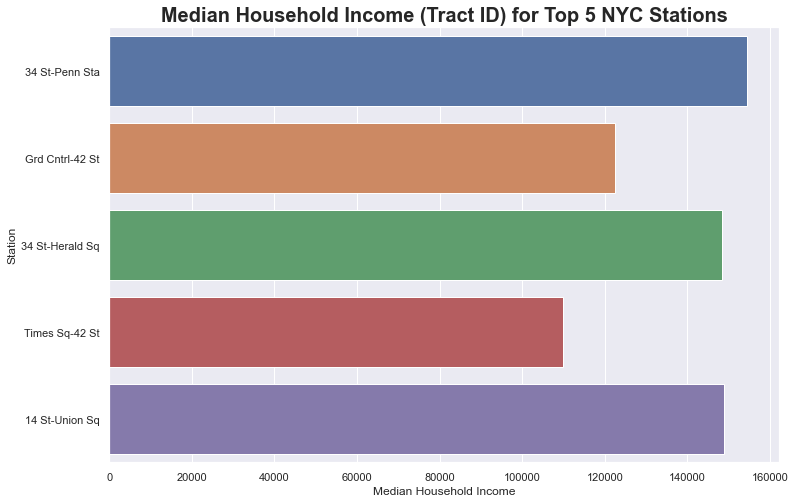

In [180]:
ax = sns.barplot(x = "Income", y = "Station", data = df_final, orient = 'h')
ax.set_title("Median Household Income (Tract ID) for Top 5 NYC Stations", weight='bold', fontsize=20)
ax.set(xlabel = "Median Household Income")
fig = ax.get_figure()
fig.savefig('top5stations_medianincome_sns.png');

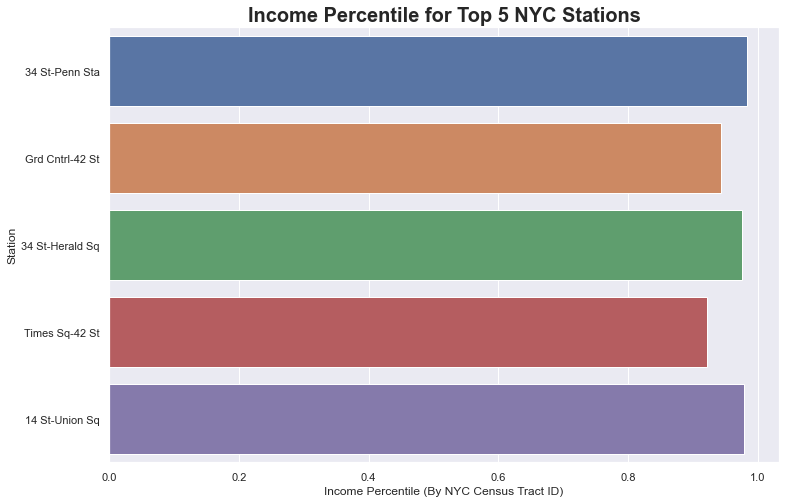

In [181]:
ax = sns.barplot(x = "Income_percentile", y = "Station", data = df_final, orient = 'h')
ax.set_title("Income Percentile for Top 5 NYC Stations", weight='bold', fontsize=20)
ax.set(xlabel = "Income Percentile (By NYC Census Tract ID)")
fig = ax.get_figure()
fig.savefig('top5stations_incomeperc_sns.png');

In [182]:
list5 = list(df_final.Station)

In [183]:
df_MTA_2019_daily['STATION'] = df_MTA_2019_daily['STATION'].apply(proper)

*Filter the top 5 stations and look at the best day of week, time of day with most traffic*

In [184]:
df_MTA_2019_top5 = df_MTA_2019_daily.loc[df_MTA_2019_daily.STATION.isin(list5)]

In [185]:
df_MTA_2019_top5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27696 entries, 5326 to 340865
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   C/A               27696 non-null  object        
 1   UNIT              27696 non-null  object        
 2   SCP               27696 non-null  object        
 3   STATION           27696 non-null  object        
 4   DATE              27696 non-null  object        
 5   ENTRIES           27696 non-null  int64         
 6   EXITS             27696 non-null  int64         
 7   PREV_DATE         27385 non-null  object        
 8   PREV_ENTRIES      27385 non-null  float64       
 9   PREV_EXITS        27385 non-null  float64       
 10  DAILY_ENTRIES     27377 non-null  float64       
 11  unique_turnstile  27696 non-null  object        
 12  DAILY_EXITS       27376 non-null  float64       
 13  Station           27696 non-null  object        
 14  DAILY_TRAFFIC     

In [186]:
df_MTA_2019_top5["DAY"] = df_MTA_2019_top5["DATE_TIME"].dt.day_name()

In [187]:
# check that value counts is approx the same for all days of the week
df_MTA_2019_top5.DAY.value_counts()

Sunday       3983
Saturday     3972
Friday       3961
Monday       3950
Thursday     3946
Tuesday      3944
Wednesday    3940
Name: DAY, dtype: int64

In [188]:
df_MTA_2019_top5_weekday = df_MTA_2019_top5.groupby('DAY')['DAILY_TRAFFIC'].sum()

In [189]:
df_MTA_2019_top5_weekday.sort_values(ascending=False,inplace=True)

In [190]:
df_MTA_2019_top5_weekday = pd.DataFrame(df_MTA_2019_top5_weekday)

In [191]:
df_MTA_2019_top5_weekday.reset_index(inplace = True)

In [192]:
df_MTA_2019_top5_weekday.index

RangeIndex(start=0, stop=7, step=1)

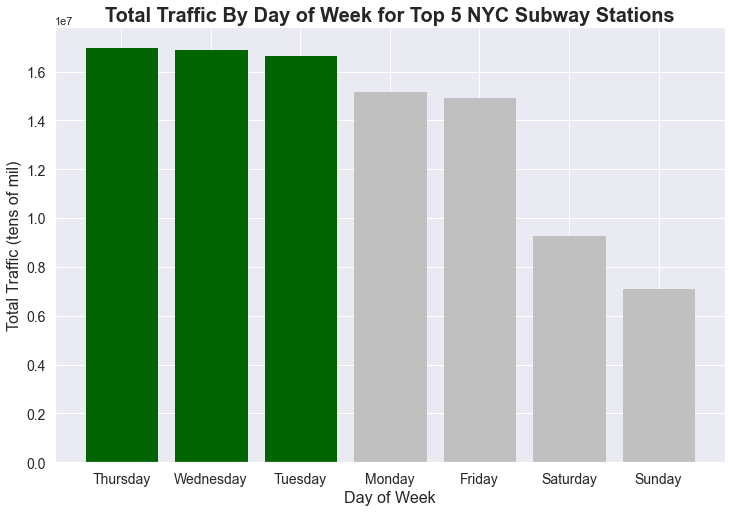

In [193]:
plt.figure(figsize=[12,8])
ax = plt.bar(df_MTA_2019_top5_weekday.DAY, df_MTA_2019_top5_weekday.DAILY_TRAFFIC)
ax[0].set_color('darkgreen')
ax[1].set_color('darkgreen')
ax[2].set_color('darkgreen')
ax[3].set_color('silver')
ax[4].set_color('silver')
ax[5].set_color('silver')
ax[6].set_color('silver')

plt.title('Total Traffic By Day of Week for Top 5 NYC Subway Stations', weight = 'bold', fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel('Day of Week', fontsize = 16)
plt.ylabel('Total Traffic (tens of mil)', fontsize = 16)
plt.savefig('traffic_dayofweek_top5NYC.png');

In [194]:
df_MTA_2019['STATION'] = df_MTA_2019['STATION'].apply(proper)

In [195]:
df_MTA_2019_top5_day_hour = df_MTA_2019[df_MTA_2019["STATION"].isin(list5)]

In [196]:
df_MTA_2019_top5_day_hour.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,station_linename
2684,A021,R032,01-00-00,Times Sq-42 St,1237ACENQRSW,BMT,03/30/2019,00:00:00,REGULAR,8693348,10641864,2019-03-30 00:00:00,TIMES SQ-42 ST_1237ACENQRSW
2685,A021,R032,01-00-00,Times Sq-42 St,1237ACENQRSW,BMT,03/30/2019,04:00:00,REGULAR,8693471,10641914,2019-03-30 04:00:00,TIMES SQ-42 ST_1237ACENQRSW
2686,A021,R032,01-00-00,Times Sq-42 St,1237ACENQRSW,BMT,03/30/2019,08:00:00,REGULAR,8693564,10642039,2019-03-30 08:00:00,TIMES SQ-42 ST_1237ACENQRSW
2687,A021,R032,01-00-00,Times Sq-42 St,1237ACENQRSW,BMT,03/30/2019,12:00:00,REGULAR,8693787,10642708,2019-03-30 12:00:00,TIMES SQ-42 ST_1237ACENQRSW
2688,A021,R032,01-00-00,Times Sq-42 St,1237ACENQRSW,BMT,03/30/2019,16:00:00,REGULAR,8694183,10643461,2019-03-30 16:00:00,TIMES SQ-42 ST_1237ACENQRSW


In [197]:
df_MTA_2019_top5_day_hour["DAY"] = df_MTA_2019_top5_day_hour["DATE_TIME"].dt.day_name()

In [198]:
# create a new column "HOUR" to extract the hour from datetime timestamps
df_MTA_2019_top5_day_hour["HOUR"] = df_MTA_2019_top5_day_hour.DATE_TIME.dt.hour

In [199]:
# filter DAY to include only Thursday, Wednesday, Tuesday (top 3 weekdays with most traffic)
df_MTA_2019_top5_day_hour = (df_MTA_2019_top5_day_hour[df_MTA_2019_top5_day_hour
                                                       .DAY
                                                       .isin(["Thursday","Wednesday","Tuesday"])])

In [200]:
df_MTA_2019_top5_day_hour["PREV_TIMESTAMP"] = (df_MTA_2019_top5_day_hour
                                                    .groupby(["C/A", "UNIT", "SCP", "STATION"])
                                                    .DATE_TIME
                                                    .apply(lambda group: group.shift(1)))

In [201]:
df_MTA_2019_top5_day_hour["PREV_TIMESTAMP_ENTRIES"] = (df_MTA_2019_top5_day_hour
                                                       .groupby(["C/A", "UNIT", "SCP", "STATION"])
                                                       .ENTRIES
                                                       .apply(lambda group: group.shift(1)))

In [202]:
df_MTA_2019_top5_day_hour.reset_index(drop=True,inplace=True)

In [203]:
df_MTA_2019_top5_day_hour["TIMESTAMP_DIFF"] = (df_MTA_2019_top5_day_hour["DATE_TIME"] - 
                                               df_MTA_2019_top5_day_hour["PREV_TIMESTAMP"])

In [204]:
df_MTA_2019_top5_day_hour.TIMESTAMP_DIFF.value_counts()

0 days 04:00:00    66666
4 days 04:00:00     3678
0 days 00:01:20      290
0 days 00:01:21      238
0 days 08:00:00      111
                   ...  
0 days 00:00:46        1
0 days 02:46:07        1
0 days 00:01:26        1
0 days 00:00:45        1
0 days 02:45:55        1
Name: TIMESTAMP_DIFF, Length: 348, dtype: int64

In [206]:
diff1 = df_MTA_2019_top5_day_hour.TIMESTAMP_DIFF.value_counts().index[0]

In [207]:
diff1

Timedelta('0 days 04:00:00')

In [208]:
# filter to only include the rows where the timestamp diff is 4 hours
df_MTA_2019_top5_day_hour = df_MTA_2019_top5_day_hour[df_MTA_2019_top5_day_hour["TIMESTAMP_DIFF"] == diff1]

In [209]:
df_MTA_2019_top5_day_hour["ENTRIES_TIME_PERIOD"] = df_MTA_2019_top5_day_hour["ENTRIES"] - df_MTA_2019_top5_day_hour["PREV_TIMESTAMP_ENTRIES"]

In [210]:
sorted(df_MTA_2019_top5_day_hour.ENTRIES_TIME_PERIOD)[0:10]

[-5214038.0,
 -3603365.0,
 -2225883.0,
 -1558851.0,
 -789188.0,
 -60722.0,
 -9466.0,
 -1814.0,
 -1809.0,
 -1798.0]

In [211]:
sorted(df_MTA_2019_top5_day_hour.ENTRIES_TIME_PERIOD)[-10:]

[3570.0,
 3570.0,
 3604.0,
 3761.0,
 3780.0,
 3854.0,
 3861.0,
 3946.0,
 3963.0,
 458749.0]

In [212]:
# assumption 1 person per second, 60 seconds per min, 60 min per hour, 4 hour period
60*60*4

14400

In [213]:
df_MTA_2019_top5_day_hour.reset_index(drop = True, inplace = True)

In [214]:
df_large_entries = (df_MTA_2019_top5_day_hour
                    .loc[abs(df_MTA_2019_top5_day_hour.ENTRIES_TIME_PERIOD) > 5000])

In [215]:
# filter out rows with large negative/positive values for ENTRIES_TIME_PERIOD
df_MTA_2019_top5_day_hour = (df_MTA_2019_top5_day_hour
                             .loc[abs(df_MTA_2019_top5_day_hour.ENTRIES_TIME_PERIOD) < 5000])

In [216]:
df_MTA_2019_top5_day_hour.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66658 entries, 0 to 66665
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype          
---  ------                  --------------  -----          
 0   C/A                     66658 non-null  object         
 1   UNIT                    66658 non-null  object         
 2   SCP                     66658 non-null  object         
 3   STATION                 66658 non-null  object         
 4   LINENAME                66658 non-null  object         
 5   DIVISION                66658 non-null  object         
 6   DATE                    66658 non-null  object         
 7   TIME                    66658 non-null  object         
 8   DESC                    66658 non-null  object         
 9   ENTRIES                 66658 non-null  int64          
 10  EXITS                   66658 non-null  int64          
 11  DATE_TIME               66658 non-null  datetime64[ns] 
 12  station_linename        66658 no

In [219]:
def reverse_num(x):
    return -x if x<0 else x

In [220]:
df_MTA_2019_top5_day_hour["ENTRIES_TIME_PERIOD"] = df_MTA_2019_top5_day_hour.ENTRIES_TIME_PERIOD.apply(reverse_num)

In [221]:
df_MTA_2019_top5_day_hour["DAY_HR"] = df_MTA_2019_top5_day_hour["DAY"] + "_" + df_MTA_2019_top5_day_hour["HOUR"].astype(str)

In [222]:
df_MTA_2019_top5_day_hour.DAY_HR.value_counts()

Wednesday_4     2766
Thursday_0      2760
Thursday_16     2759
Tuesday_4       2758
Thursday_8      2757
Thursday_4      2752
Wednesday_0     2751
Tuesday_8       2750
Wednesday_16    2737
Thursday_20     2726
Tuesday_20      2719
Tuesday_16      2716
Wednesday_20    2713
Wednesday_8     2692
Tuesday_12      2611
Thursday_12     2605
Wednesday_12    2572
Thursday_21      940
Wednesday_21     938
Thursday_5       937
Thursday_1       937
Tuesday_5        936
Tuesday_21       933
Wednesday_1      931
Wednesday_5      930
Thursday_17      925
Wednesday_17     925
Tuesday_17       917
Wednesday_13     917
Tuesday_9        904
Wednesday_9      887
Thursday_13      878
Thursday_9       869
Tuesday_13       857
Wednesday_2      299
Tuesday_14       299
Tuesday_18       299
Thursday_2       299
Thursday_18      299
Wednesday_14     299
Thursday_22      299
Tuesday_6        299
Wednesday_18     299
Tuesday_22       299
Wednesday_22     299
Wednesday_6      299
Thursday_14      298
Thursday_6   

In [227]:
df_MTA_2019_top5_pivot = df_MTA_2019_top5_day_hour.pivot_table(values = "ENTRIES_TIME_PERIOD", index = "HOUR", columns = "DAY", aggfunc = 'sum')

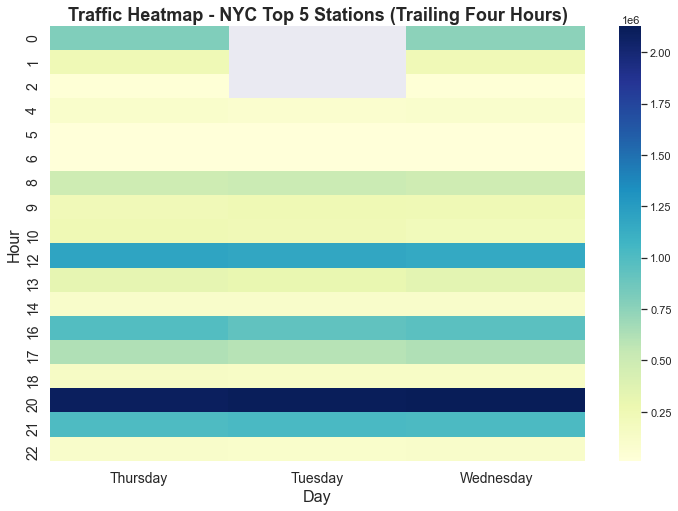

In [228]:
plt.figure(figsize=(12,8))
sns.heatmap(df_MTA_2019_top5_pivot, cmap='YlGnBu')

plt.title("Traffic Heatmap - NYC Top 5 Stations (Trailing Four Hours)", 
          weight = "bold", fontsize = 18)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel("Day", fontsize = 16)
plt.ylabel("Hour", fontsize = 16)
plt.savefig('nyc_top5stations_dayhour_traffic_heatmap.png');